# <center>Demand Forecasting Project                       

## Import reqired library

In [1]:
# For Data Manupulation
import numpy as np 
import pandas as pd
# For Data Visualisation 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 
# For Ignoreing warnings
import warnings
warnings.filterwarnings('ignore')

#for training model


## Problem Statements

## Dataset  Description

record_ID : Unique ID for each week store sku combination

week : Starting Date of the week

store_id : Unique ID for each store (no numerical order to be assumed)

sku_id : Unique ID for each product (no numerical order to be assumed)

total_price : Sales Price of the product 

base_price : Base price of the product

is_featured_sku : Was part of the featured item of the week

is_display_sku : Product was on display at a prominent place at the store

units_sold : (Target) Total Units sold for that week-store-sku combination

DataSet_link : https://www.analyticsvidhya.com/datahack/contest/janatahack-demand-forecasting/#ProblemStatement

## Loading DataSets

In [2]:
#loading DataSets
df=pd.read_csv(r"C:\Users\Cheta\Desktop\Project-1-Demand_forcating\training_data.csv")

In [3]:
df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [4]:
print(f"Shape of dataset \n No. of rows :- {df.shape[0]} \n No. of columns :- {df.shape[1]}")

Shape of dataset 
 No. of rows :- 150150 
 No. of columns :- 9


In [5]:
#checking how many sku sell by saler 
print(f"Checking how many sku :- \n {df['sku_id'].nunique()} ")
#checking how many store 
print(f"Checking how many store :- \n {df['store_id'].nunique()}")

Checking how many sku :- 
 28 
Checking how many store :- 
 76


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


In [7]:
df.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,150150.000000,150150.000000,150150.000000,150149.000000,150150.000000,150150.000000,150150.000000,150150.000000
mean,106271.555504,9199.422511,254761.132468,206.626751,219.425927,0.095611,0.133200,51.674206
std,61386.037861,615.591445,85547.306447,103.308516,110.961712,0.294058,0.339792,60.207904
min,1.000000,8023.000000,216233.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53111.250000,8562.000000,217217.000000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106226.500000,9371.000000,222087.000000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159452.750000,9731.000000,245338.000000,233.700000,234.412500,0.000000,0.000000,62.000000
max,212644.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000,2876.000000


## Data Cleaning and Preprocessing

In [8]:
# convert data type of week columns to datatime format 
 
df['week']=pd.to_datetime(df['week'])

In [9]:
#checking duplicate and any null value in data

print('checking null value and count :-')
print(df.isna().sum().to_frame(name='Total Null Value Counts')) 

#replcaing null value to mean value of total_price
df['total_price'].fillna(df['total_price'].mean())
print('-'*40)
#checking any duplicate data or not 
print(f"\nAny duplicate record :- {df.duplicated().sum()}")
#Create new column 'total_spend_money'
df['total_spend_money']=df['total_price']*df['units_sold']

checking null value and count :-
                 Total Null Value Counts
record_ID                              0
week                                   0
store_id                               0
sku_id                                 0
total_price                            1
base_price                             0
is_featured_sku                        0
is_display_sku                         0
units_sold                             0
----------------------------------------

Any duplicate record :- 0


In [10]:
df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,total_spend_money
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20,1980.75
1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28,2773.05
2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19,2545.05
3,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44,5893.80
4,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52,7335.90


## EDA (Exploratory Data Analysis)

#### 1) Calculate how many sku sold in each store
#### 2) which store has highest and lowest sku sold less than base price ,higher than base price and equal to base price 

In [11]:
#checking store wise sku_sold 
print('Store wise total sku unit sold :-')
total_sku_sold=pd.DataFrame(df.groupby('store_id')['units_sold'].sum().sort_values(ascending=False).reset_index().rename(columns={'units_sold':'total_sku_sold'}))
print(total_sku_sold)
print('-'*40)


# checking how many product sold less than base price
print("checking how many sku sold less than base price :-")
product_sold_less_than_base_price=pd.DataFrame(df[df['base_price']>df['total_price']].groupby(['store_id'])['units_sold'].sum().reset_index().sort_values('units_sold',ascending=False).rename(columns={'units_sold':'Total_sku_sold'}))
print(product_sold_less_than_base_price)
print('-'*40)
#checking how many product sold higher than  base price 
print('checking how many sku sold higher than  base price :-')
product_sold_higher_than_base_price=pd.DataFrame(df[df['base_price']<df['total_price']].groupby(['store_id'])['units_sold'].sum().reset_index().sort_values('units_sold',ascending=False).rename(columns={'units_sold':'Total_sku_sold'}))
print(product_sold_higher_than_base_price)
print('-'*40)
#checking how many sku sold equal to base price 
print('checking how many sku sold equal to  base price :-')
product_sold_equal_to_base_price=pd.DataFrame(df[df['base_price']==df['total_price']].groupby(['store_id'])['units_sold'].sum().reset_index().sort_values('units_sold',ascending=False).rename(columns={'units_sold':'Total_sku_sold'}))
print(product_sold_equal_to_base_price)
print('-'*40)




Store wise total sku unit sold :-
    store_id  total_sku_sold
0       8023          296478
1       9845          261410
2       9823          233846
3       9112          218127
4       9613          205710
..       ...             ...
71      8555           34766
72      8392           30968
73      9178           27572
74      9700           13154
75      9001            6053

[76 rows x 2 columns]
----------------------------------------
checking how many sku sold less than base price :-
    store_id  Total_sku_sold
65      9845          116550
0       8023          115645
24      9112          105463
63      9823           89834
51      9613           88205
..       ...             ...
11      8392           13030
16      8555           12883
28      9178           12194
55      9700            5365
21      9001            1875

[76 rows x 2 columns]
----------------------------------------
checking how many sku sold higher than  base price :-
    store_id  Total_sku_sold
30      

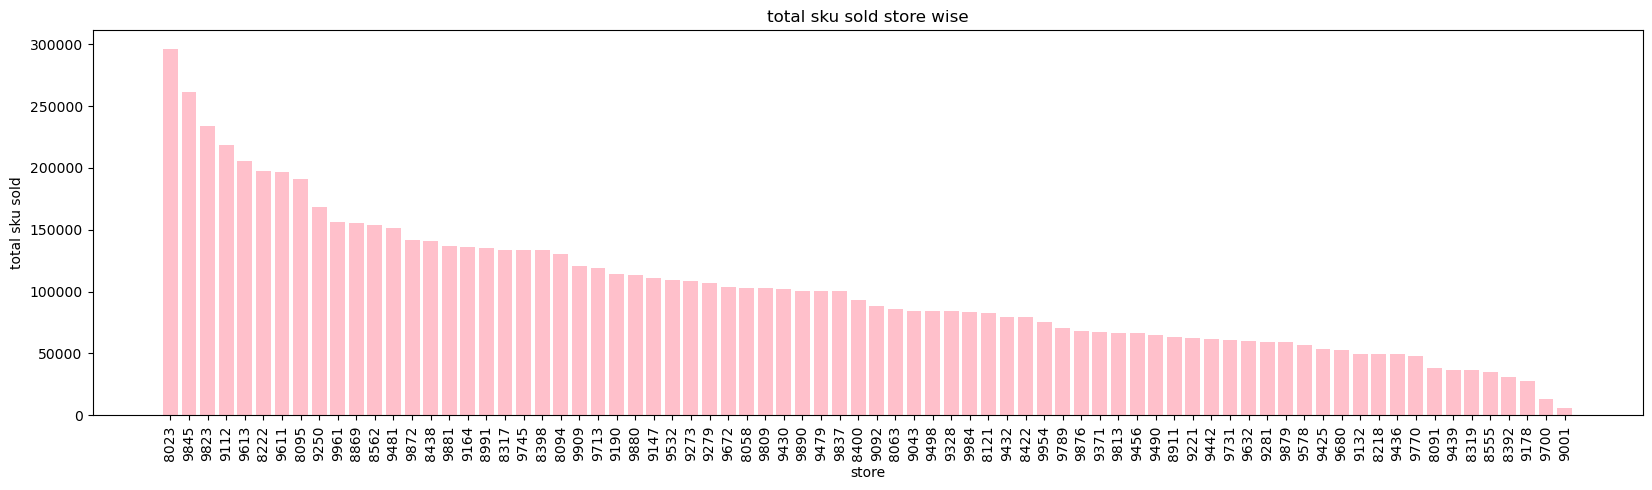

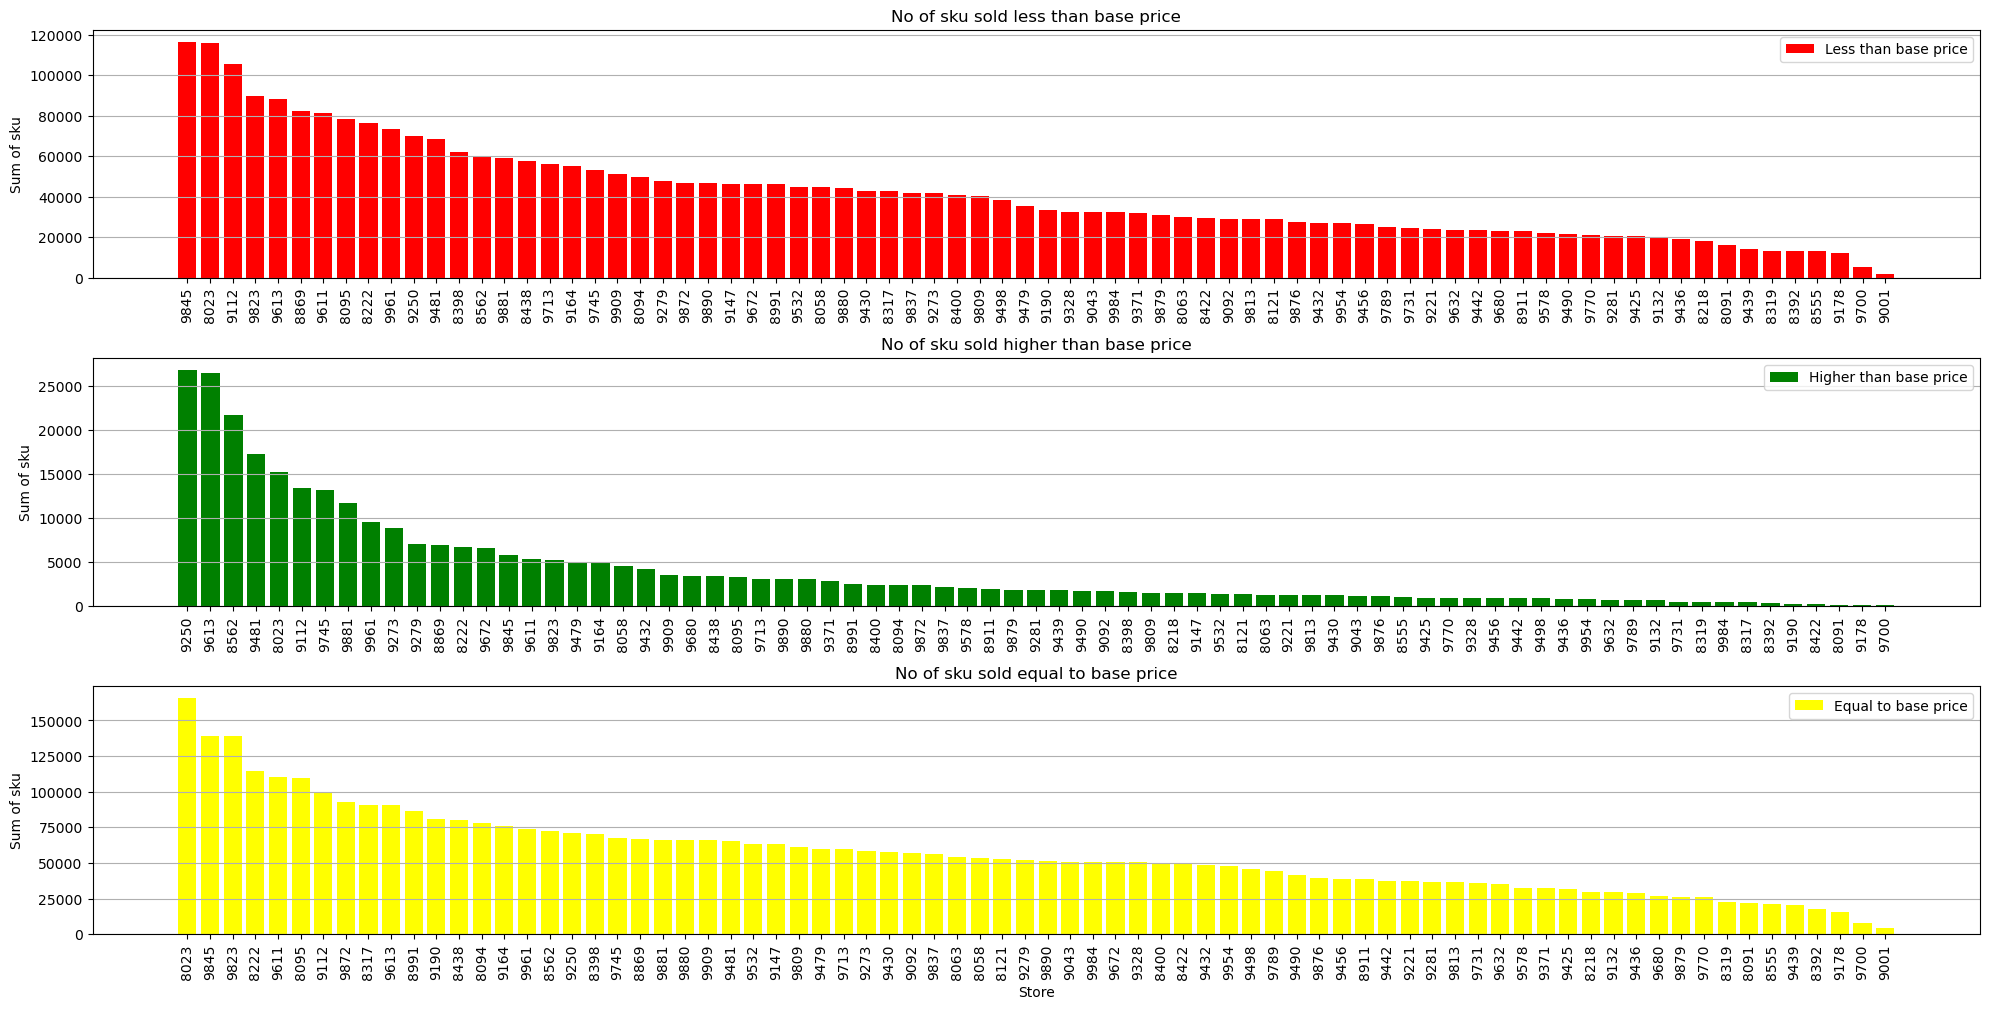

In [14]:
#checking total_sku_sold in each store
plt.figure(figsize=(20,5))
plt.bar(total_sku_sold.iloc[:,0].astype(str),total_sku_sold.iloc[:,1],color='pink')
plt.title('total sku sold store wise')
plt.xlabel('store')
plt.xticks(rotation=90) 
plt.ylabel('total sku sold')
plt.show()

# checking how many product sold less than base price
plt.figure(figsize=(20,10))
plt.subplot(3,1,1)
plt.bar(product_sold_less_than_base_price['store_id'].astype(str),product_sold_less_than_base_price['Total_sku_sold'],label='Less than base price',color='red')
plt.title("No of sku sold less than base price")
plt.legend()
plt.grid(True,axis='y')
plt.ylabel('Sum of sku')
plt.xticks(rotation=90) 

#checking how many product sold higher than  base price 
plt.subplot(3,1,2)
plt.bar(product_sold_higher_than_base_price['store_id'].astype(str),product_sold_higher_than_base_price['Total_sku_sold'],label='Higher than base price',color='green')
plt.legend()
plt.title("No of sku sold higher than base price")
plt.ylabel('Sum of sku')
plt.grid(True,axis='y')
plt.xticks(rotation=90) 

#checking how many sku sold equal to base price 
plt.subplot(3,1,3)
plt.bar(product_sold_equal_to_base_price['store_id'].astype(str),product_sold_equal_to_base_price['Total_sku_sold'],label='Equal to base price',color='yellow')
plt.title("No of sku sold equal to base price")
plt.grid(True,axis='y')
plt.xticks(rotation=90) 
plt.legend()
plt.tight_layout() 
plt.xlabel('Store')
plt.ylabel('Sum of sku')
plt.show()

In [27]:
#checking highest and lowest sale store wise 
print('Answer question 1 and 2\n\n')
print('checking highest and lowest sale of store sku wise :-')
print(f'store_id : {total_sku_sold.iloc[0][0]} has highest sku sold {total_sku_sold.iloc[0][1]} and\
        \nstore_id : {total_sku_sold.iloc[-1][0]} has lowest sku sold {total_sku_sold.iloc[-1][1]} ')
print('-'*40) 
#checking  highest and lowest sku sold Less than base price in whole data
a1=product_sold_less_than_base_price.iloc[0][0]
a2=product_sold_less_than_base_price.iloc[0][1]
a3=product_sold_less_than_base_price.iloc[-1][0]
a4=product_sold_less_than_base_price.iloc[-1][1]
print('highest and lowest sku sold less than base price in whole data :-')
print(f"store_id : {a1} has highest sku sold less than base price is  : {a2} and \nstore id : {a3} has lowest sku sold less than base price is : {a4}")
print('-'*40)
#checking  highest and lowest sku sold Higher than base price in whole data
b1=product_sold_higher_than_base_price.iloc[0][0]
b2=product_sold_higher_than_base_price.iloc[0][1]
b3=product_sold_higher_than_base_price.iloc[-1][0]
b4=product_sold_higher_than_base_price.iloc[-1][1]
print('highest and lowest sku sold higher than base price in whole data :-')
print(f"store_id : {b1} has highest sku sold higher than base price is  : {b2} and \nstore id : {b3} has lowest sku sold higher than base price is : {b4}")
print('-'*40)

#checking  highest and lowest sku sold Equal to base price in whole data
c1=product_sold_equal_to_base_price.iloc[0][0]
c2=product_sold_equal_to_base_price.iloc[0][1]
c3=product_sold_equal_to_base_price.iloc[-1][0]
c4=product_sold_equal_to_base_price.iloc[-1][1]
print('highest and lowest sku sold Equal to base price in whole data :-')
print(f"store_id : {c1} has highest sku sold Equal to base price is  : {c2} and \nstore id : {c3} has lowest sku sold Equal to base price is : {c4}")
print('-'*40)

Answer question 1 and 2


checking highest and lowest sale of store sku wise :-
store_id : 8023 has highest sku sold 296478 and        
store_id : 9001 has lowest sku sold 6053 
----------------------------------------
highest and lowest sku sold less than base price in whole data :-
store_id : 9845 has highest sku sold less than base price is  : 116550 and 
store id : 9001 has lowest sku sold less than base price is : 1875
----------------------------------------
highest and lowest sku sold higher than base price in whole data :-
store_id : 9250 has highest sku sold higher than base price is  : 26875 and 
store id : 9700 has lowest sku sold higher than base price is : 122
----------------------------------------
highest and lowest sku sold Equal to base price in whole data :-
store_id : 8023 has highest sku sold Equal to base price is  : 165587 and 
store id : 9001 has lowest sku sold Equal to base price is : 4178
----------------------------------------


#### 3) Checking top and bottom 2 sku sold in each store

In [99]:
# Checking top 2 sku sold in each store 
print('Answer\n\n') 
top_2_sku_per_store = (
    df.groupby(['store_id', 'sku_id'])['units_sold']
      .sum()
      .reset_index()
      .sort_values(['store_id', 'units_sold'], ascending=[True, False])
      .groupby('store_id')
      .head(2)
) 
print('Top 2 sku sold in each store :-')
print(top_2_sku_per_store.head(10))
print('-'*40)
# Checking Bottom 2 sku sold in each store 

bottom_2_sku_per_store = (
    df.groupby(['store_id', 'sku_id'])['units_sold']
      .sum()
      .reset_index()
      .sort_values(['store_id', 'units_sold'], ascending=[True, True])
      .groupby('store_id')
      .head(2)
) 
print('Bottom 2 sku sold in each store :-')
print(bottom_2_sku_per_store.head(10))

Answer


Top 2 sku sold in each store :-
    store_id  sku_id  units_sold
1       8023  216418       32289
5       8023  219009       31515
22      8058  216418       12799
26      8058  219009       11490
42      8063  219009       12868
47      8063  223245        9139
61      8091  219029        5754
62      8091  223153        4945
71      8094  219009       14719
66      8094  216419       12580
----------------------------------------
Bottom 2 sku sold in each store :-
    store_id  sku_id  units_sold
18      8023  545621        1980
17      8023  398721        3170
35      8058  378934        1502
34      8058  320485        2361
53      8063  547934        1030
54      8063  679023        1192
58      8091  216425        3337
56      8091  216418        3429
81      8094  300291        1337
87      8094  679023        1738


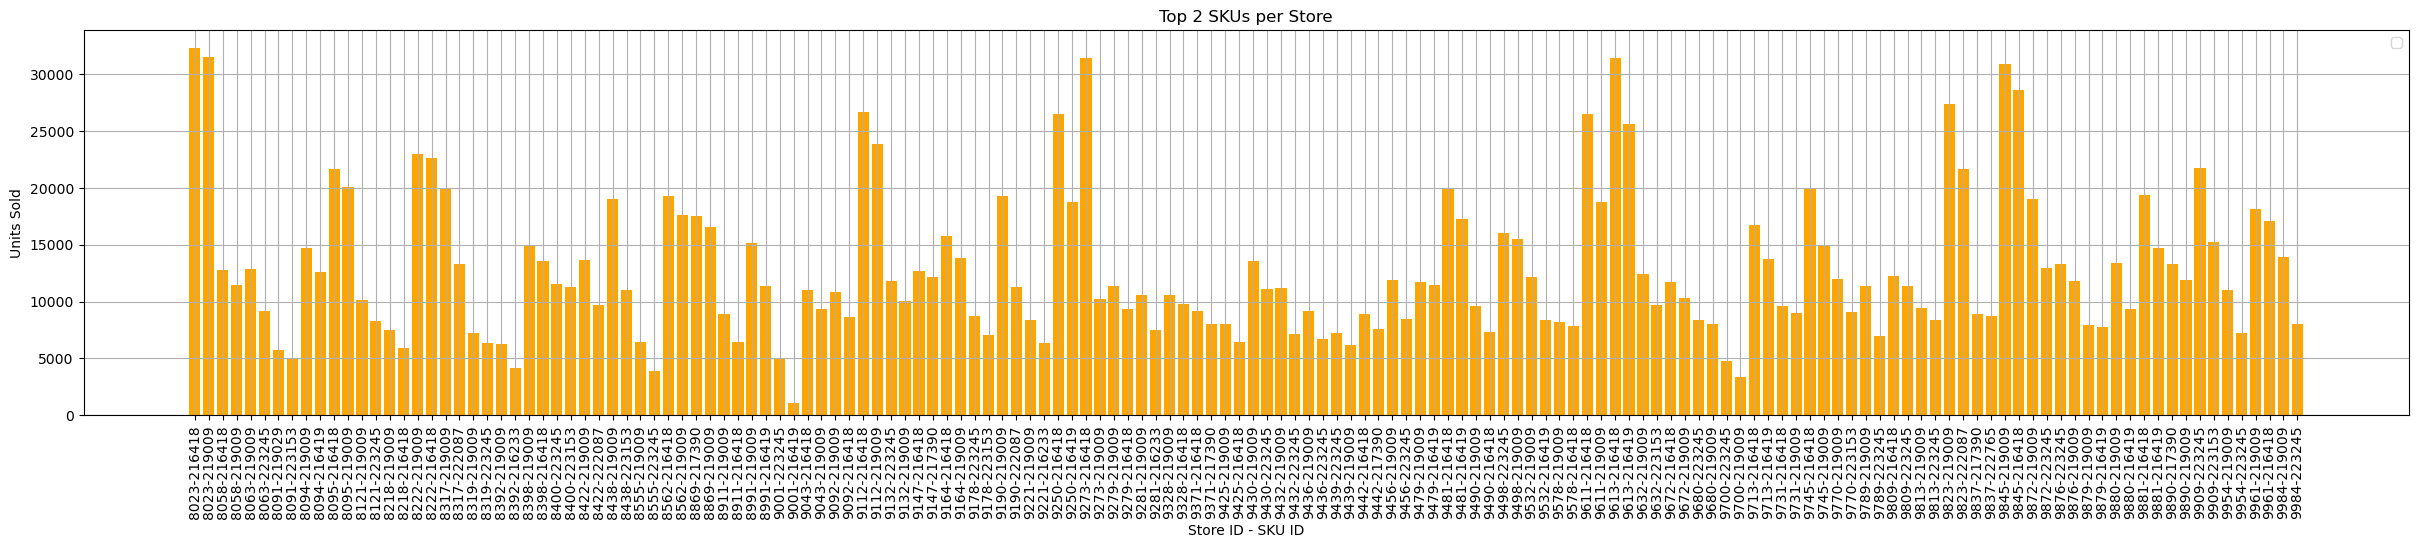

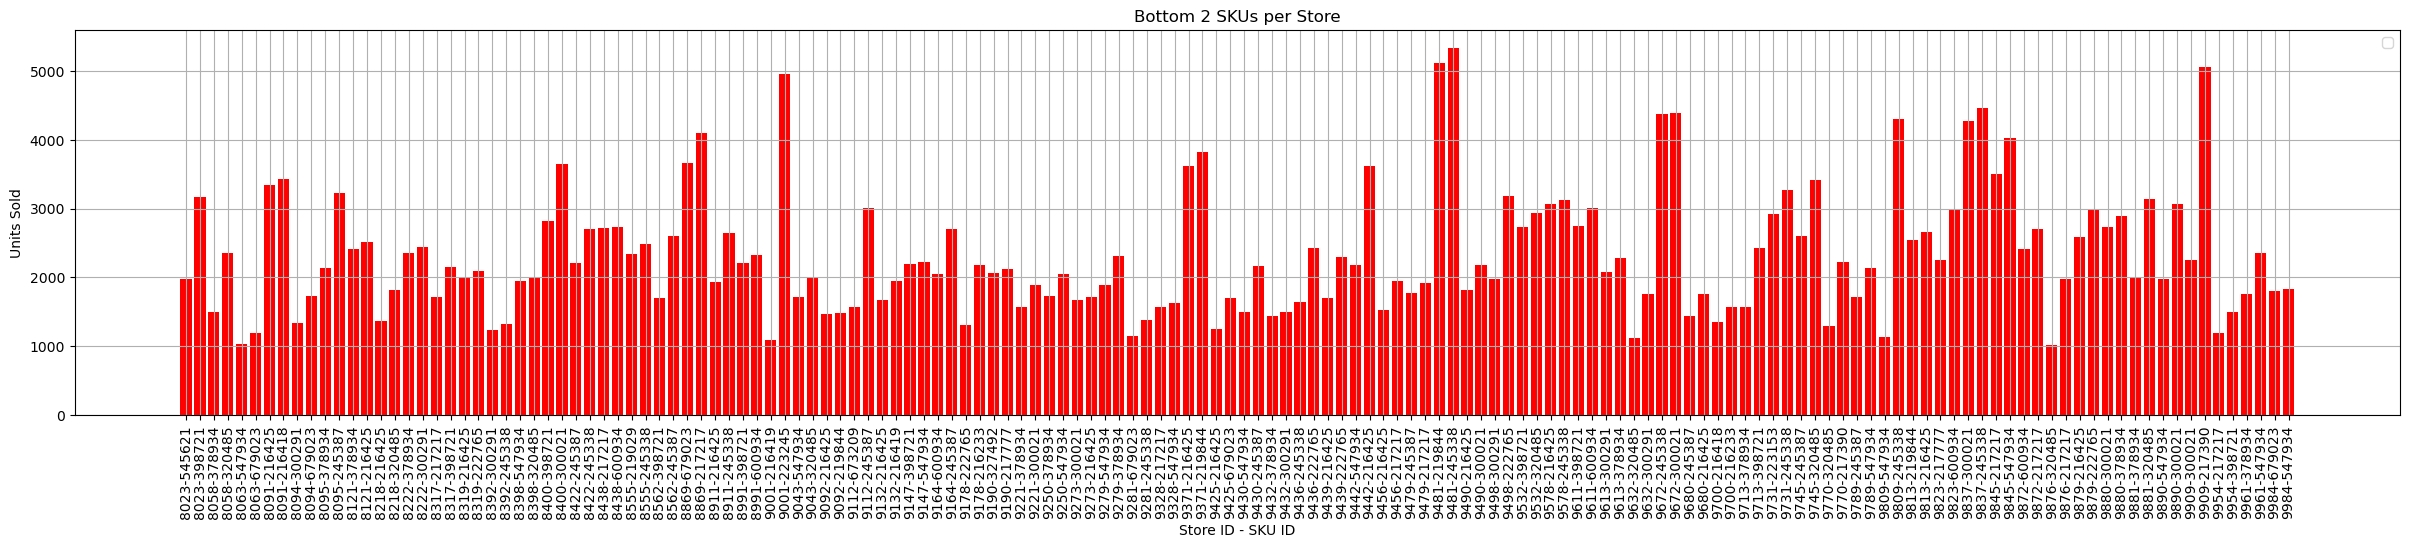

In [98]:
# plotting top 2 sku sold in each store

plt.figure(figsize=(30,5))
plt.bar(x=top_2_sku_per_store['store_id'].astype(str)+"-"+top_2_sku_per_store['sku_id'].astype(str),height=top_2_sku_per_store['units_sold'],color='orange')
plt.xticks(rotation=90)
plt.xlabel('Store ID - SKU ID')
plt.ylabel('Units Sold')
plt.title('Top 2 SKUs per Store')
plt.grid(True)
plt.legend()
plt.show()

# plotting bottom 2 sku sold in each store

plt.figure(figsize=(30,5))
plt.bar(x=bottom_2_sku_per_store['store_id'].astype(str)+"-"+bottom_2_sku_per_store['sku_id'].astype(str),height=bottom_2_sku_per_store['units_sold'],color='red')
plt.xticks(rotation=90)
plt.xlabel('Store ID - SKU ID')
plt.ylabel('Units Sold')
plt.title('Bottom 2 SKUs per Store')
plt.grid(True)
plt.legend()
plt.show()

In [104]:
df.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,total_spend_money
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20,1980.75
1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28,2773.05
2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19,2545.05
3,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44,5893.80
4,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52,7335.90


76

In [120]:
df['week'].min()

Timestamp('2011-01-08 00:00:00')

In [121]:
df['week'].max()

Timestamp('2013-12-03 00:00:00')

In [124]:
df['week'].dt.year

0         2011
1         2011
2         2011
3         2011
4         2011
          ... 
150145    2013
150146    2013
150147    2013
150148    2013
150149    2013
Name: week, Length: 150150, dtype: int32